# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Muhtarom Ahkam Maulana
- **Email:** muhtaromahkam0@gmail.com
- **ID Dicoding:** muhtaromahkam

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk apa yang paling banyak dan paling sedikit terjual?
- Pertanyaan 2 : Bagaimana demografi customer berdasarkan jenis pembayaran yang digunakan?
- Pertanyaan 3 : Bagaimana demografi pesanan yang tercatat berdasarkan status order?

## Import Semua Packages/Library yang Digunakan

In [1]:
# Mengimpor Library serta package yang dibutuhkan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset dengan menggunakan library pandas
customers = pd.read_csv('/content/customers_dataset.csv')
geo = pd.read_csv('/content/geolocation_dataset.csv')
items = pd.read_csv('/content/order_items_dataset.csv')
payments = pd.read_csv('/content/order_payments_dataset.csv')
reviews = pd.read_csv('/content/order_reviews_dataset.csv')
orders = pd.read_csv('/content/orders_dataset.csv')
category = pd.read_csv('/content/product_category_name_translation.csv')
products = pd.read_csv('/content/products_dataset.csv')
sellers = pd.read_csv('/content/sellers_dataset.csv')

### Assessing Data

In [3]:
# Menilai tiap tiap tabel
customers.info()
geo.info()
items.info()
payments.info()
reviews.info()
orders.info()
category.info()
products.info()
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  

In [4]:
# Melihat data duplikat dari tiap tiap tabel
print("Jumlah duplikasi pada tabel customer sebanyak ", customers.duplicated().sum())
print("Jumlah duplikasi pada tabel geo sebanyak ", geo.duplicated().sum())
print("Jumlah duplikasi pada tabel items sebanyak ", items.duplicated().sum())
print("Jumlah duplikasi pada tabel payments sebanyak ", payments.duplicated().sum())
print("Jumlah duplikasi pada tabel reviews sebanyak ", reviews.duplicated().sum())
print("Jumlah duplikasi pada tabel orders sebanyak ", orders.duplicated().sum())
print("Jumlah duplikasi pada tabel category sebanyak ", category.duplicated().sum())
print("Jumlah duplikasi pada tabel products sebanyak ", products.duplicated().sum())
print("Jumlah duplikasi pada tabel sellers sebanyak ", sellers.duplicated().sum())

Jumlah duplikasi pada tabel customer sebanyak  0
Jumlah duplikasi pada tabel geo sebanyak  261831
Jumlah duplikasi pada tabel items sebanyak  0
Jumlah duplikasi pada tabel payments sebanyak  0
Jumlah duplikasi pada tabel reviews sebanyak  0
Jumlah duplikasi pada tabel orders sebanyak  0
Jumlah duplikasi pada tabel category sebanyak  0
Jumlah duplikasi pada tabel products sebanyak  0
Jumlah duplikasi pada tabel sellers sebanyak  0


In [5]:
# Melihat missing value dari tabel customer
customers.isnull().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [6]:
# Melihat missing value dari tabel geolocation
geo.isnull().sum()

,0
geolocation_zip_code_prefix,0
geolocation_lat,0
geolocation_lng,0
geolocation_city,0
geolocation_state,0


In [7]:
# Melihat missing value dari tabel items
items.isnull().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [8]:
# Melihat missing value dari tabel payments
payments.isnull().sum()

,0
order_id,0
payment_sequential,0
payment_type,0
payment_installments,0
payment_value,0


In [9]:
# Melihat missing value dari tabel order reviews
reviews.isnull().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [10]:
# Melihat missing value dari tabel orders
orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [11]:
# Melihat missing value dari tabel customer
category.isnull().sum()

,0
product_category_name,0
product_category_name_english,0


In [12]:
# Melihat missing value dari tabel customer
products.isnull().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [13]:
# Melihat missing value dari tabel customer
sellers.isnull().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


In [14]:
# Melihat deskripsi statistik dari tabel customer
customers.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


In [15]:
# Melihat deskripsi statistik dari tabel geo
geo.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [16]:
# Melihat deskripsi statistik dari tabel items
items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [17]:
# Melihat deskripsi statistik dari tabel payments
payments.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


In [18]:
# Melihat deskripsi statistik dari tabel reviews
reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [19]:
# Melihat deskripsi statistik dari tabel orders
orders.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [20]:
# Melihat deskripsi statistik dari tabel category
category.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [21]:
# Melihat deskripsi statistik dari tabel products
products.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [22]:
# Melihat deskripsi statistik dari tabel sellers
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### Cleaning Data

In [23]:
# Memperbaiki tipe data
datetime_order = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]
for column in datetime_order:
  orders[column] = pd.to_datetime(orders[column], errors='coerce')

datetime_items = ["shipping_limit_date"]
for column in datetime_items:
  items[column] = pd.to_datetime(items[column], errors='coerce')

datetime_reviews = ["review_creation_date","review_answer_timestamp"]
for column in datetime_reviews:
  reviews[column] = pd.to_datetime(reviews[column], errors='coerce')

In [24]:
# Menghilangkan data duplikat pada tabel geo
geo.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", geo.duplicated().sum())

Jumlah duplikasi:  0


In [25]:
# Menghilangkan kolom review comment title pada dataset order review karena memilki banyak missing value
reviews = reviews.drop('review_comment_title', axis=1)

In [26]:
# Menghilangkan kolom pada tabel product yang tidak diperlukan dalam analisis
products = products.drop(['product_name_lenght', 'product_description_lenght', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis=1)

In [27]:
# Mengisi kategori produk yang hilang dengan other
products['product_category_name'].fillna(value='other', inplace=True)

# Mengganti nilai yang missing pada photo dengan 0
products['product_photos_qty'].fillna(value=0, inplace=True)

## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
# mengelompokkan customer berdasarkan customer_state,
# menghitung jumlah customer_id yang unik pada setiap state
# mengurutkannya dari jumlah terbanyak.
customers.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [29]:
# mengelompokkan payment berdasarkan payment_type,
# menghitung jumlah order id yang unik pada tiap payment
# mengurutkannya dari jumlah terbanyak.
payments.groupby(by="payment_type").order_id.nunique().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76505
boleto,19784
voucher,3866
debit_card,1528
not_defined,3


In [30]:
# mengelompokkan status order,
# menghitung jumlah order id yang unik pada tiap payment
# mengurutkannya dari jumlah terbanyak.
orders.groupby(by="order_status").order_id.nunique().sort_values(ascending=False)

,order_id
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [31]:
# Menggabungkan (Merge) antara tabel customer dengan order
customers_orders = pd.merge(
    left=customers,
    right=orders,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [32]:
# Menggabungkan (Merge) antara tabel payment dengan review
payments_reviews = pd.merge(
    left=payments,
    right=reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
payments_reviews.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33,4ce650e117a5b292bf5ea980a61eb61e,1.0,"Produto com qualidade ruim, amassado e descasc...",2018-05-10,2018-05-15 23:38:00
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39,ad2036caca61484fc435d7e673c020f2,5.0,NaN,2018-06-30,2018-07-03 11:23:16
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71,bcddfa0f7d2e54cfc74bae4f01b84d92,5.0,Aprovada,2017-12-19,2017-12-22 17:55:30
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,c37a0e51e5df82bdb55d38ff0ffb6af3,5.0,NaN,2017-12-21,2017-12-21 21:42:31
4,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78,5bc7680443b4ef765fec11a8201eeb0c,5.0,NaN,2017-12-21,2017-12-22 01:10:39


In [33]:
# Menggabungkan (Merge) antara tabel produk dengan category
product_category = pd.merge(
    left=products,
    right=category,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
product_category.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares


In [34]:
# Menggabungkan (Merge) antara tabel item dengan seller
item_seller = pd.merge(
    left=items,
    right=sellers,
    how="left",
    left_on="seller_id",
    right_on="seller_id"
)
item_seller.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,37564,borda da mata,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,14403,franca,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,87900,loanda,PR


In [35]:
# Menggabungkan (Merge) antara tabel customer_order dengan payments_reviews
customers_df = pd.merge(
    left=customers_orders,
    right=payments_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05,1.0,credit_card,2.0,146.87,88b8b52d46df026a9d1ad2136a59b30b,4.0,NaN,2017-05-26,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06,1.0,credit_card,8.0,335.48,02fc48a9efa3e3d0f1a8ea26507eeec3,5.0,NaN,2018-01-30,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13,1.0,credit_card,7.0,157.73,5ad6695d76ee186dc473c42706984d87,5.0,NaN,2018-06-15,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10,1.0,credit_card,1.0,173.30,059a801bb31f6aab2266e672cab87bc5,5.0,NaN,2018-03-29,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15,1.0,credit_card,8.0,252.25,8490879d58d6c5d7773f2739a03f089a,5.0,O baratheon è esxelente Amo adoro o baratheon,2018-08-10,2018-08-17 01:59:52


In [36]:
# Menggabungkan (Merge) antara tabel product_category dengan item_seller
sellers_df = pd.merge(
    left=product_category,
    right=item_seller,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sellers_df.head()

,product_id,product_category_name,product_photos_qty,product_category_name_english,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,perfumery,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,art,5236307716393b7114b53ee991f36956,1,b561927807645834b59ef0d16ba55a24,2018-02-06 19:11:15,248.00,17.99,2955,sao paulo,SP
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,sports_leisure,01f66e58769f84129811d43eefd187fb,1,7b07b3c7487f0ea825fc6df75abd658b,2018-07-11 21:30:20,79.80,7.82,2016,sao paulo,SP
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,baby,143d00a4f2dde4e0364ee1821577adb3,1,c510bc1718f0f2961eaa42a23330681a,2018-08-07 09:10:13,112.30,9.54,13330,indaiatuba,SP
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,housewares,86cafb8794cb99a9b1b77fc8e48fbbbb,1,0be8ff43f22e456b4e0371b2245e4d01,2018-04-17 01:30:23,37.90,8.29,4461,sao paulo,SP


In [37]:
# Menggabungkan semua tabel yang telah di merge
all_data = pd.merge(
    left=customers_df,
    right=sellers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,product_photos_qty,product_category_name_english,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,8577.0,itaquaquecetuba,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,3.0,housewares,1.0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,88303.0,itajai,SC
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,8577.0,itaquaquecetuba,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,office_furniture,1.0,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,8577.0,itaquaquecetuba,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,home_confort,1.0,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,14940.0,ibitinga,SP


In [38]:
# Menilai info dari data setelah digabung (merge)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    119143 non-null  object        
 1   customer_unique_id             119143 non-null  object        
 2   customer_zip_code_prefix       119143 non-null  int64         
 3   customer_city                  119143 non-null  object        
 4   customer_state                 119143 non-null  object        
 5   order_id                       119143 non-null  object        
 6   order_status                   119143 non-null  object        
 7   order_purchase_timestamp       119143 non-null  datetime64[ns]
 8   order_approved_at              118966 non-null  datetime64[ns]
 9   order_delivered_carrier_date   117057 non-null  datetime64[ns]
 10  order_delivered_customer_date  115722 non-null  datetime64[ns]
 11  

In [39]:
# Mengelompokkan data berdasarkan custome state
# Menghitung order id unik dan menambahkan nilai pembayaran berdasarkan state
all_data.groupby(by="customer_state").agg({
    "order_id": "nunique",
    "payment_value": "sum"
}).sort_values(by="payment_value", ascending=False)

,order_id,payment_value
customer_state,,
SP,41746,7726078.35
RJ,12852,2795615.67
MG,11635,2351221.09
RS,5466,1160175.66
PR,5045,1079795.49
BA,3380,805070.98
SC,3637,801276.45
GO,2020,520481.65
DF,2140,438095.32


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang paling banyak dan paling sedikit terjual?

In [40]:
# Mengelompokkan data berdasarkan nama produk dan menjumlahkan tiap order id
product_sales = all_data.groupby('product_category_name_english')['order_id'].count().sort_values(ascending=False)

# Mendapatkan produk dengan penjualan terbanyak
most_sold_product = product_sales.idxmax()
most_sold_count = product_sales.max()

# Mendapatkan produk dengan penjualan sedikit
least_sold_product = product_sales.idxmin()
least_sold_count = product_sales.min()

print(f"The product category with the most sales is '{most_sold_product}' with {most_sold_count} orders.")
print(f"The product category with the least sales is '{least_sold_product}' with {least_sold_count} orders.")

The product category with the most sales is 'bed_bath_table' with 11988 orders.
The product category with the least sales is 'security_and_services' with 2 orders.


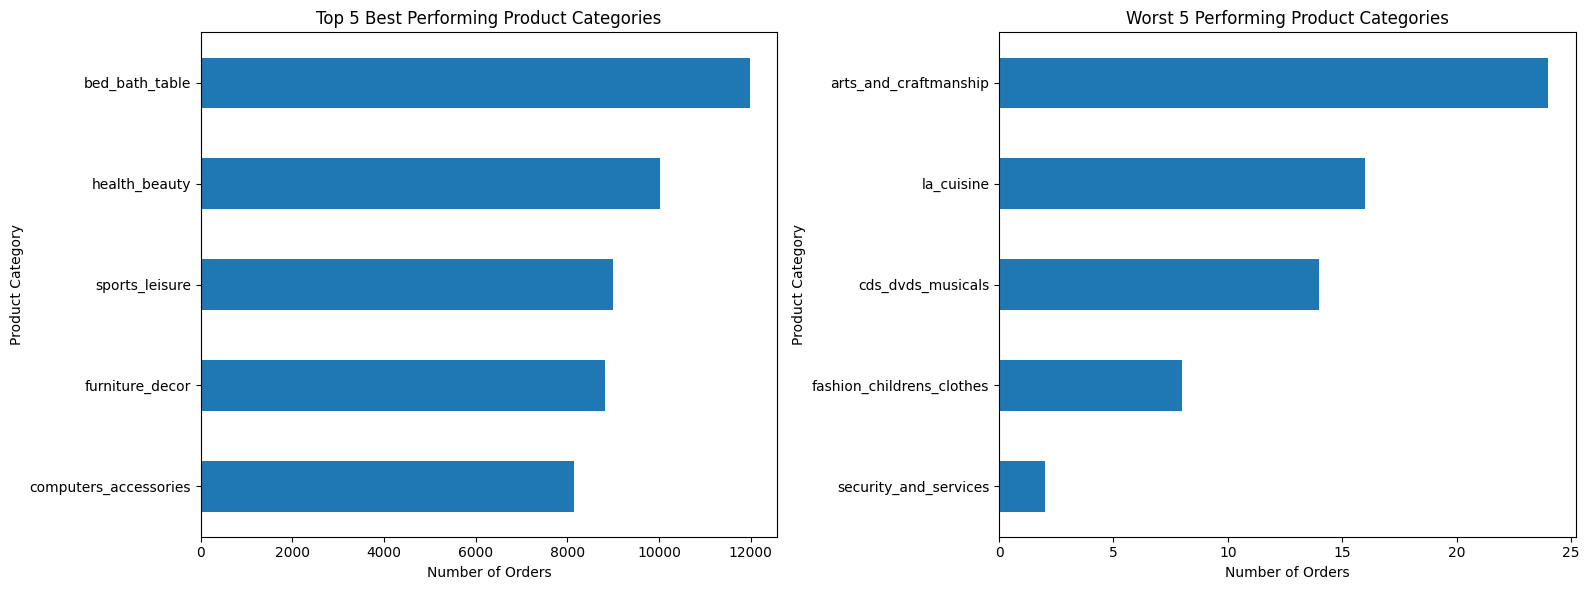

In [41]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(16, 6))

# Top 5 Performing Products
product_sales.head(5).sort_values(ascending=True).plot(kind='barh', ax=ax0)
ax0.set_title('Top 5 Best Performing Product Categories')
ax0.set_xlabel('Number of Orders')
ax0.set_ylabel('Product Category')

# Worst 5 Performing Products
product_sales.tail(5).sort_values(ascending=True).plot(kind='barh', ax=ax1)
ax1.set_title('Worst 5 Performing Product Categories')
ax1.set_xlabel('Number of Orders')
ax1.set_ylabel('Product Category')

plt.tight_layout()
plt.show()


### Pertanyaan 2 : Bagaimana demografi customer berdasarkan jenis pembayaran yang digunakan?

In [42]:
# Mengelompokkan customer berdasarkan tipe pembayaran yang digunakan berdasarkan customer id yang unik
customer_payment_groups = all_data.groupby('payment_type')['customer_unique_id'].nunique()

# print hasil yang didapat
print(customer_payment_groups)

payment_type
boleto         19290
credit_card    74092
debit_card      1513
not_defined        3
voucher         3760
Name: customer_unique_id, dtype: int64


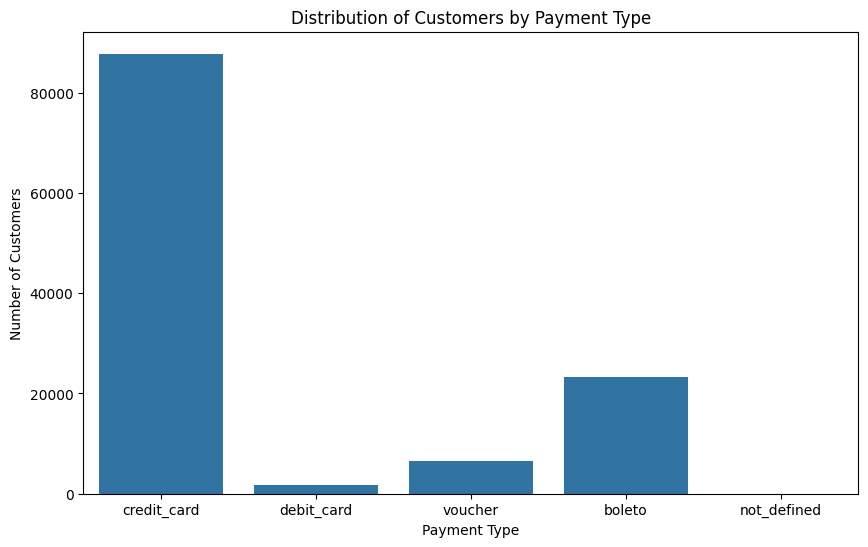

In [43]:
# Visualize the distribution of customers by payment type
plt.figure(figsize=(10, 6))
sns.countplot(x='payment_type', data=all_data)
plt.title('Distribution of Customers by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Number of Customers')
plt.show()

### Pertanyaan 3 : Bagaimana demografi pesanan yang tercatat berdasarkan status order?

In [44]:
# Group customers by order status and count the number of unique customers
customer_order_status_groups = all_data.groupby('order_status')['customer_unique_id'].nunique()

# Print the results
print(customer_order_status_groups)

order_status
approved           2
canceled         616
created            5
delivered      93358
invoiced         314
processing       301
shipped         1100
unavailable      604
Name: customer_unique_id, dtype: int64


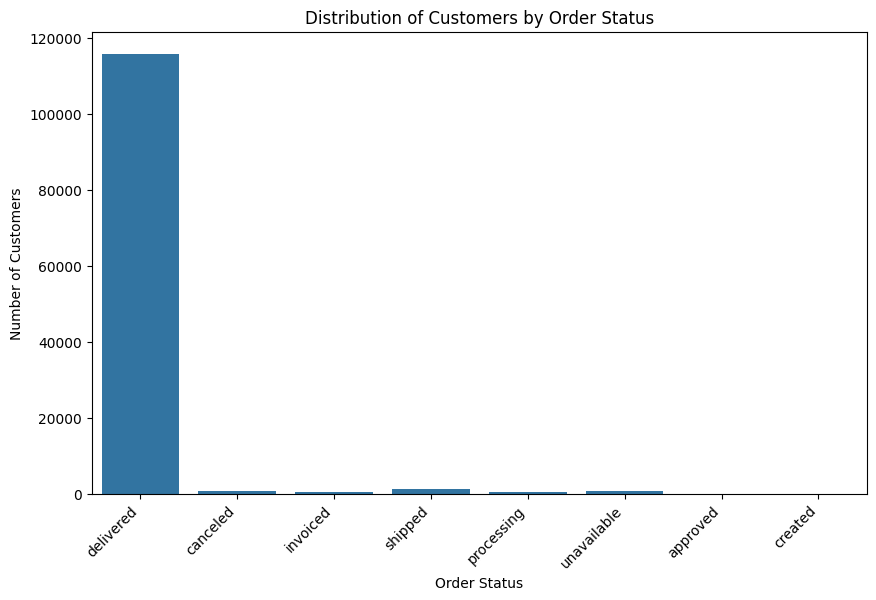

In [45]:
# Visualize the distribution of customers by order status
plt.figure(figsize=(10, 6))
sns.countplot(x='order_status', data=all_data)
plt.title('Distribution of Customers by Order Status')
plt.xlabel('Order Status')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

## Analisis Lanjutan (Opsional)

In [46]:
# RFM Analysis
rfm_df = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", #mengambil tanggal order terakhir
    "order_id": "nunique",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14 16:08:26,1,89.80
1,000161a058600d5901f007fab4c27140,2017-07-16 09:40:32,1,54.90
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28 11:06:43,1,179.99
3,0002414f95344307404f0ace7a26f1d5,2017-08-16 13:09:20,1,149.90
4,000379cdec625522490c315e70c7a9fb,2018-04-02 13:42:17,1,93.00


In [47]:
# Convert 'max_order_timestamp' to datetime
rfm_df["max_order_timestamp"] = pd.to_datetime(rfm_df["max_order_timestamp"])

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
rfm_df.head()

,customer_id,max_order_timestamp,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1,89.80,337
1,000161a058600d5901f007fab4c27140,2017-07-16,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1,93.00,198


In [48]:
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


In [49]:
rfm_df.describe()

,frequency,monetary,recency
count,99441.0,99441.000000,99441.000000
mean,1.0,143.539382,290.272956
std,0.0,241.433332,153.670615
min,1.0,0.000000,0.000000
25%,1.0,45.950000,166.000000
50%,1.0,89.000000,272.000000
75%,1.0,153.800000,400.000000
max,1.0,13440.000000,773.000000


In [50]:
rfm_df.sort_values(by="recency", ascending=True).head(5)

,customer_id,frequency,monetary,recency
63970,a4b417188addbc05b26b72d5e44837a1,1,0.0,0
51713,856336203359aa6a61bf3826f7d84c49,1,0.0,1
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,1,0.0,14
74611,bf6181a85bbb4115736c0a8db1a53be3,1,0.0,16
15595,2823ffda607a2316375088e0d00005ec,1,0.0,18


In [51]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
66279,aa62a16b10e3fb24ecdefd7e4dc3fa65,1,139.00,115
66301,aa738cdb72af39e38482fa25b992c67c,1,53.90,222
66300,aa7210736aad65a84e964cfa8d64aa66,1,259.80,202
66299,aa72002446dfbac0691304465c1b982d,1,9.99,612


<ipython-input-52-6053626cf2ec>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
<ipython-input-52-6053626cf2ec>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
<ipython-input-52-6053626cf2ec>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="

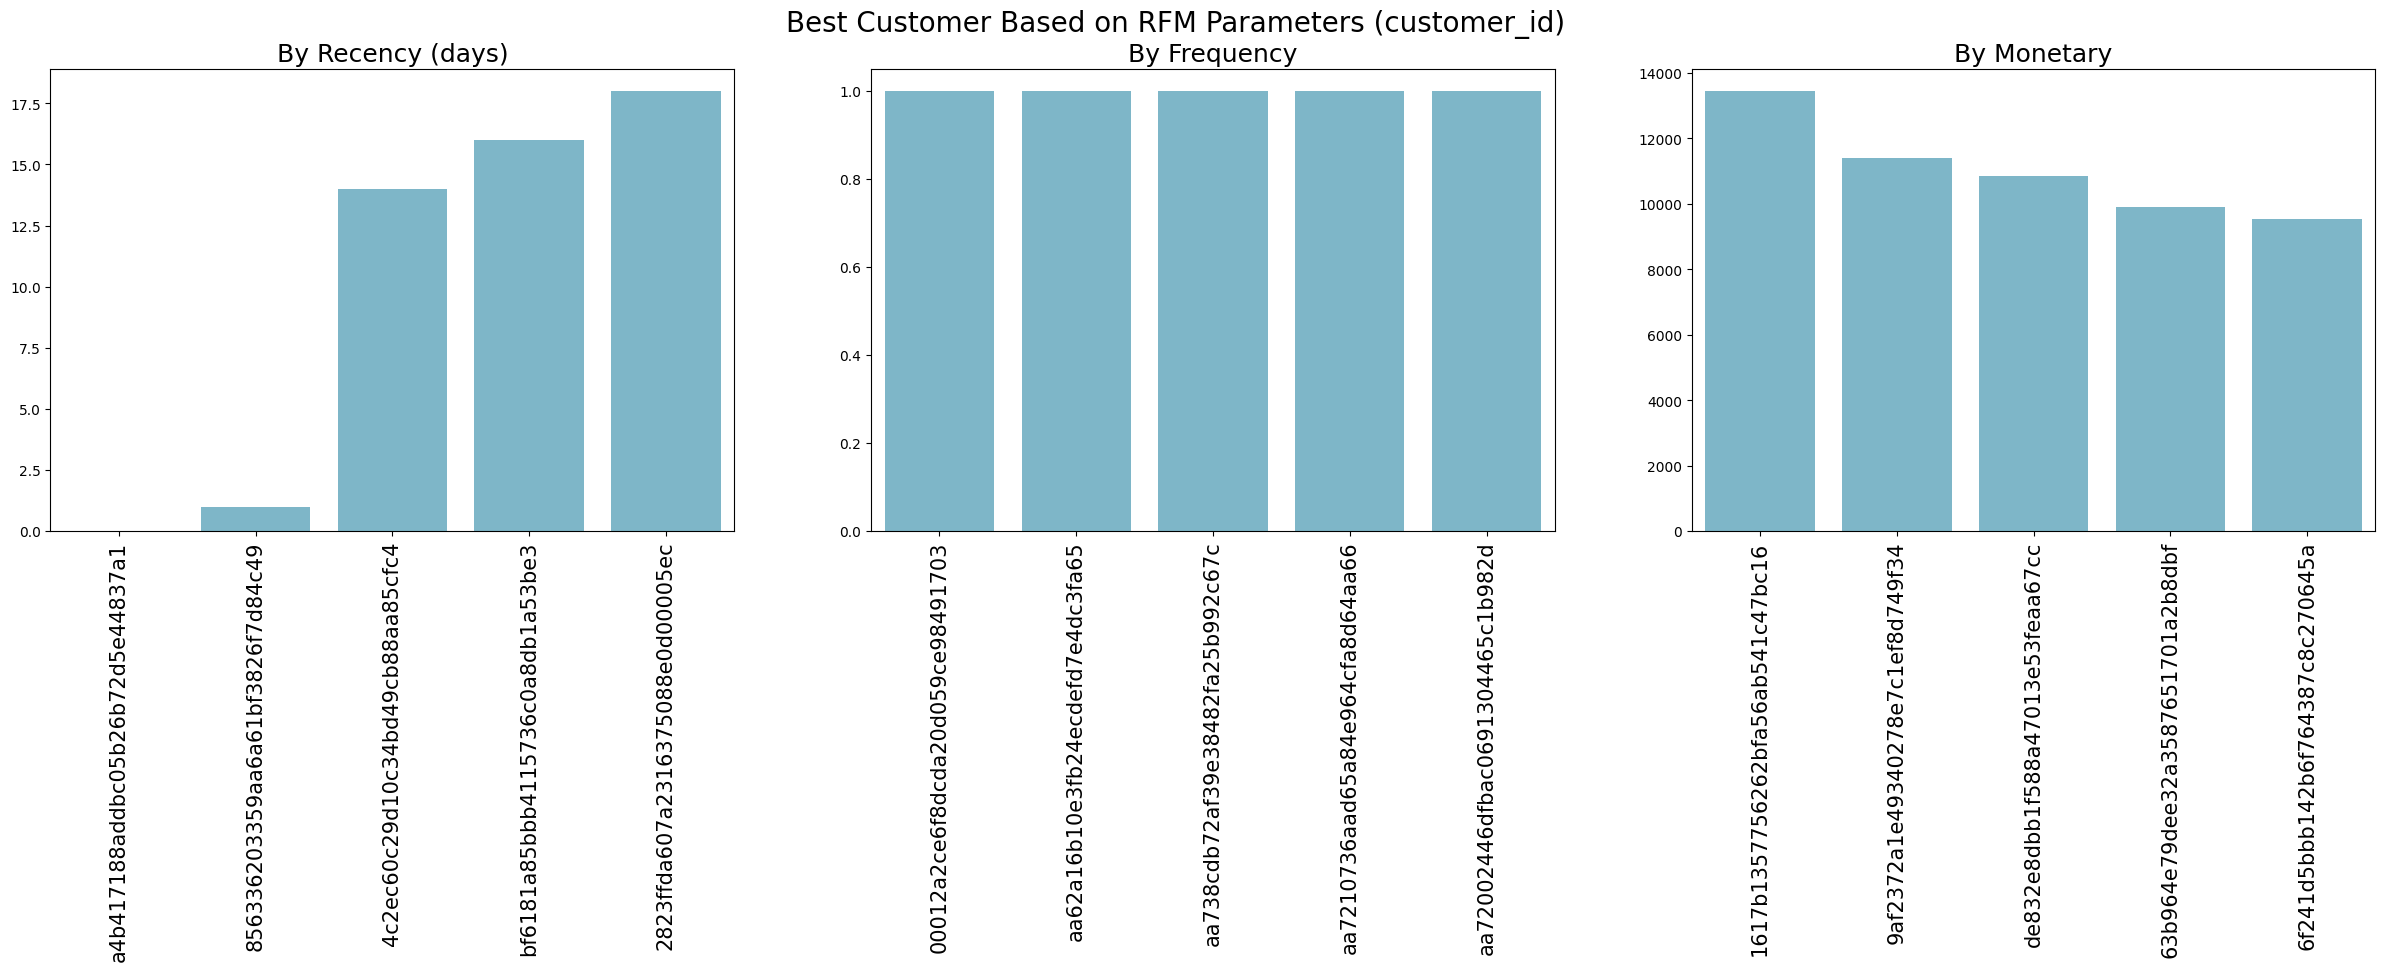

In [52]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, rotation=90)

sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

In [53]:
rfm_df['r_rank'] = rfm_df['recency'].rank(ascending=False)
rfm_df['f_rank'] = rfm_df['frequency'].rank(ascending=True)
rfm_df['m_rank'] = rfm_df['monetary'].rank(ascending=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank,f_rank,m_rank
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34364.5,49721.0,50182.5
1,000161a058600d5901f007fab4c27140,1,54.90,458,16871.5,49721.0,31252.5
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2882.0,49721.0,79937.0
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21181.5,49721.0,73341.0
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,66986.5,49721.0,52578.5


In [54]:
# normalizing the rank of the customers
rfm_df['r_rank_norm'] = (rfm_df['r_rank']/rfm_df['r_rank'].max())*100
rfm_df['f_rank_norm'] = (rfm_df['f_rank']/rfm_df['f_rank'].max())*100
rfm_df['m_rank_norm'] = (rfm_df['m_rank']/rfm_df['m_rank'].max())*100

rfm_df.drop(columns=['r_rank', 'f_rank', 'm_rank'], inplace=True)

rfm_df.head()

,customer_id,frequency,monetary,recency,r_rank_norm,f_rank_norm,m_rank_norm
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337,34.557677,100.0,50.464597
1,000161a058600d5901f007fab4c27140,1,54.90,458,16.966342,100.0,31.428184
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596,2.898201,100.0,80.386360
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427,21.300570,100.0,73.753281
4,000379cdec625522490c315e70c7a9fb,1,93.00,198,67.363060,100.0,52.874066


In [55]:
rfm_df['RFM_score'] = 0.15*rfm_df['r_rank_norm']+0.28 * \
    rfm_df['f_rank_norm']+0.57*rfm_df['m_rank_norm']
rfm_df['RFM_score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['customer_id', 'RFM_score']].head(7)

,customer_id,RFM_score
0,00012a2ce6f8dcda20d059ce98491703,3.10
1,000161a058600d5901f007fab4c27140,2.42
2,0001fd6190edaaf884bcaf3d49edf079,3.71
3,0002414f95344307404f0ace7a26f1d5,3.66
4,000379cdec625522490c315e70c7a9fb,3.41
5,0004164d20a9e969af783496f3408652,2.50
6,000419c5494106c306a97b5635748086,2.33


In [56]:
rfm_df["customer_segment"] = np.where(
    rfm_df['RFM_score'] > 4.5, "Top customers", (np.where(
        rfm_df['RFM_score'] > 4, "High value customer",(np.where(
            rfm_df['RFM_score'] > 3, "Medium value customer", np.where(
                rfm_df['RFM_score'] > 1.6, 'Low value customers', 'lost customers'))))))

rfm_df[['customer_id', 'RFM_score', 'customer_segment']].head(20)

,customer_id,RFM_score,customer_segment
0,00012a2ce6f8dcda20d059ce98491703,3.10,Medium value customer
1,000161a058600d5901f007fab4c27140,2.42,Low value customers
2,0001fd6190edaaf884bcaf3d49edf079,3.71,Medium value customer
3,0002414f95344307404f0ace7a26f1d5,3.66,Medium value customer
4,000379cdec625522490c315e70c7a9fb,3.41,Medium value customer
5,0004164d20a9e969af783496f3408652,2.50,Low value customers
6,000419c5494106c306a97b5635748086,2.33,Low value customers
7,00046a560d407e99b969756e0b10f282,3.60,Medium value customer
8,00050bf6e01e69d5c0fd612f1bcfb69c,2.80,Low value customers
9,000598caf2ef4117407665ac33275130,4.95,Top customers


In [57]:
customer_segment_df = rfm_df.groupby(by="customer_segment", as_index=False).customer_id.nunique()
customer_segment_df

,customer_segment,customer_id
0,High value customer,16207
1,Low value customers,41634
2,Medium value customer,34900
3,Top customers,5489
4,lost customers,1211


<ipython-input-58-4e12b7bfef00>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


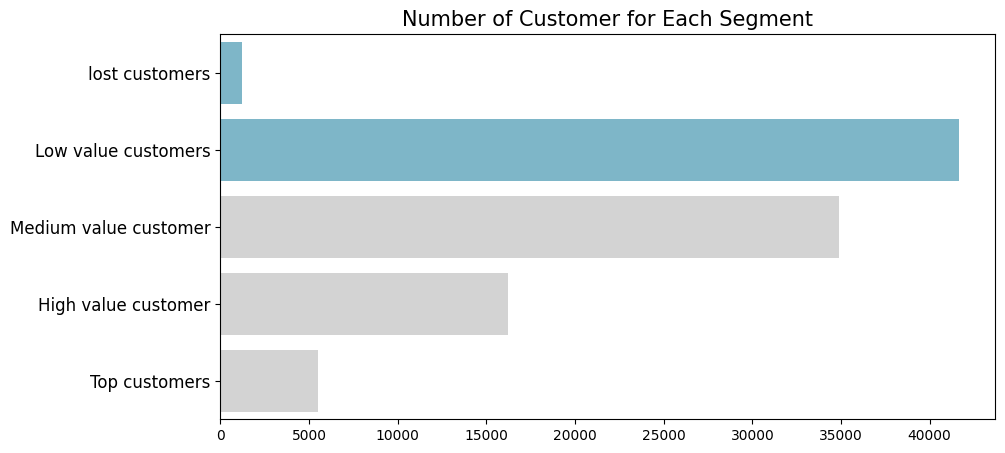

In [58]:
customer_segment_df['customer_segment'] = pd.Categorical(customer_segment_df['customer_segment'], [
    "lost customers", "Low value customers", "Medium value customer",
    "High value customer", "Top customers"
])


plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_id",
    y="customer_segment",
    data=customer_segment_df.sort_values(by="customer_segment", ascending=False),
    palette=colors_
)
plt.title("Number of Customer for Each Segment", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

## Conclusion

- Conclution pertanyaan 1
Kategori produk dengan penjualan terbanyak adalah 'bed_bath_table' dengan 11.988 pesanan. Sedangkan kategori produk dengan penjualan paling sedikit adalah 'security_and_services' dengan hanya 2 pesanan.

- Conclution pertanyaan 2
Jenis pembayaran dengan jumlah terbanyak adalah kartu kredit dengan 74.092 transaksi, diikuti oleh boleto dengan 19.290 transaksi. Metode voucher digunakan dalam 3.760 transaksi, sementara kartu debit digunakan dalam 1.513 transaksi. Ada juga 3 transaksi yang tidak memiliki metode pembayaran yang terdefinisi.

- Conclution pertanyaan 3
Status pesanan dengan jumlah terbanyak adalah delivered dengan 93.358 pesanan yang telah dikirim. Sebanyak 1.100 pesanan berstatus shipped, 616 pesanan dibatalkan, dan 604 pesanan berstatus unavailable. Ada juga 314 pesanan yang sudah invoiced, 301 dalam proses processing, 5 pesanan baru created, dan 2 pesanan telah approved